<a href="https://colab.research.google.com/github/ScriptsRemote/SCRIPTSREMOTE/blob/main/00_Cluster_pizzaria_de_poa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Instalação das bibliotecas
!pip install geobr geopandas descartes mapclassify osmnx -q

In [ ]:
#importar pacotes
import geobr
import geopandas as gpd
import folium
import mapclassify
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
##Abrindo a base geobr e selecionando o município
gdf = geobr.read_municipality(code_muni='RS', year=2020)
gdf.head()

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<Axes: >

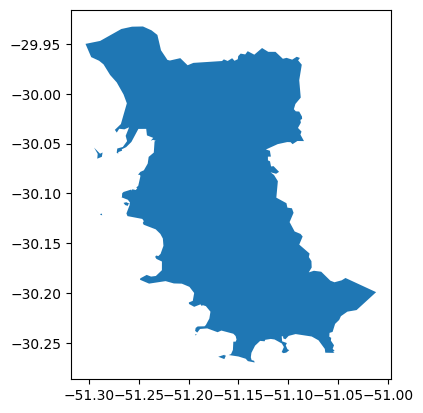

In [ ]:
##Filtrando o municipio
poa = gdf[gdf.name_muni=='Porto Alegre']
poa.plot()

In [ ]:
##Informações sobre o dado
# Defina o CRS atual do seu GeoDataFrame
poa.crs = 'epsg:4674'  # Substitua 'CRS_ATUAL' pelo CRS atual do seu dado
poa.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# Vamos recuperar os dados do OpenStreetMap (OSM)
# especificando como o endereço onde os dados devem ser baixados

# Especifique o nome que é usado para pesquisar os dados
place_name = "Porto Alegre, Rio Grande do Sul, Brazil"

# Busca a rede de ruas OSM do local
graph = ox.graph_from_place(place_name)
type(graph)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:183: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]


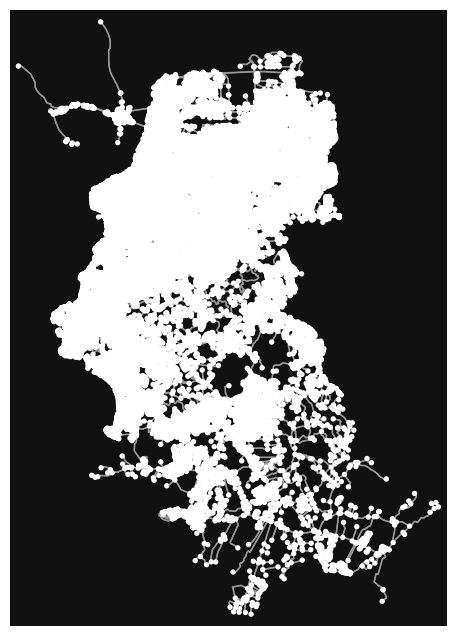

In [ ]:
# Ok, como podemos ver, os dados que recuperamos
# são um objeto de dados especial chamado networkx.classes.multidigraph.MultiDiGraph.
# Um DiGraph é um tipo de dados que armazena nós
# e arestas com dados opcionais ou atributos.

# Plot the streets
fig, ax = ox.plot_graph(graph)

In [ ]:
# Vamos baixar os prédios com buildings_from_place()
# a função - e plotá-los no topo de nossa rede de ruas.
# Vamos também plotar o polígono que representa a área
# que pode ser recuperada com gdf_from_placea função -.

# Recupere a pegada de nossa localização
area = ox.gdf_from_place(place_name)

# Recupere edifícios da área
buildings = ox.footprints_from_place(place_name)

# Que tipos são esses?
print(type(area))
print(type(buildings ))

/usr/local/lib/python3.10/dist-packages/osmnx/boundaries.py:36: UserWarning: The `boundaries` module has been deprecated and will be removed in a future relase. Use the `geocoder` module's `geocode_to_gdf` function instead.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/osmnx/geocoder.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [ ]:
# Recuperar restaurantes

# Retrieve restaurants
restaurants = ox.pois_from_place(place_name,
                                 tags={'amenity':'True',
                                       'cuisine': 'pizza'})

In [ ]:
# Quantos restaurantes temos?
print(len(restaurants))

35


In [ ]:
# Vamos explorar que tipo de atributos temos em nossos restaurantes GeoDataFrame
restaurants.columns


Index(['osmid', 'geometry', 'amenity', 'cuisine', 'name', 'element_type',
       'addr:city', 'addr:housenumber', 'addr:postcode', 'addr:street',
       'addr:suburb', 'contact:phone', 'opening_hours', 'website',
       'wheelchair', 'entrance', 'diet:vegan', 'diet:vegetarian', 'note',
       'official_name', 'phone', 'addr:housename', 'alt_name', 'description',
       'contact:website', 'delivery', 'level', 'takeaway', 'brand',
       'brand:wikidata', 'brand:wikipedia', 'outdoor_seating', 'capacity',
       'addr:full', 'payment:credit_cards', 'internet_access', 'nodes',
       'operator', 'building', 'shop', 'start_date', 'email', 'landuse',
       'drive_through', 'smoking', 'building:levels'],
      dtype='object')

In [ ]:
# Selecione algumas cols úteis e imprima
cols = ['name', 'cuisine', 'opening_hours', 'addr:city',
        'addr:housenumber', 'addr:postcode', 'addr:street']
# Print os 10 primeiros
restaurants[cols]

,name,cuisine,opening_hours,addr:city,addr:housenumber,addr:postcode,addr:street
1245887101,Pizza Pizza,pizza,NaN,NaN,NaN,NaN,NaN
1314010327,Pizzaria Cheiro Verde,pizza,Mo-Sa 19:00-23:00,Porto Alegre,844,90620-001,"Avenida Princesa Isabel, 844"
2209960251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2380759413,Govinda,pizza,Tu-Fr 11:00-14:30; Sa-Su 11:00-15:00; Th-Sa 19...,Porto Alegre,605,90040-100,Avenida José Bonifácio
2933692687,Don Matraconni,pizza,Mo-Sa 19:00-23:00,NaN,2320,NaN,Avenida Wenceslau Escobar
3108273682,Pizzaria Venus,pizza,We-Su 11:00-14:00; PH Mo-Su 18:00-24:00,NaN,755,90010-282,Rua Duque de Caxias
3282017062,NaN,pizza,NaN,NaN,NaN,NaN,NaN
3409878235,Il Giardinetto,pizza,NaN,NaN,246,NaN,Avenida Palmeira
3733833050,Olivas Pizzas e Pratos,pizza,NaN,NaN,7163,91310-003,Avenida Protásio Alves
3753196777,Torre de Pizza,pizza,"Mo-Su 11:00-14:00, 18:00-01:00",Porto Alegre,776,90050-100,Rua General Lima e Silva


In [ ]:
# Recuperar nós e arestas
nodes, edges = ox.graph_to_gdfs(graph)
print("Nodes:\n", nodes.head(), '\n')
print("Edges:\n", edges.head(), '\n')
print("Type:", type(edges))

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


Nodes:
                    y          x      osmid highway  ref  \
583532590 -30.107994 -51.256011  583532590     NaN  NaN   
583532596 -30.108276 -51.256820  583532596     NaN  NaN   
583532602 -30.107217 -51.257280  583532602     NaN  NaN   
583532603 -30.106404 -51.257660  583532603     NaN  NaN   
330956867 -30.042115 -51.215534  330956867     NaN  NaN   

                              geometry  
583532590  POINT (-51.25601 -30.10799)  
583532596  POINT (-51.25682 -30.10828)  
583532602  POINT (-51.25728 -30.10722)  
583532603  POINT (-51.25766 -30.10640)  
330956867  POINT (-51.21553 -30.04211)   

Edges:
        osmid lanes                                 name      highway maxspeed  \
0  219477651     2                  Rua Doutor Barcelos     tertiary       40   
1  219477651     2                  Rua Doutor Barcelos     tertiary       40   
2   38444516     2    Rua Pedro de Oliveira Bittencourt  residential       40   
3   70349233     2  Rua Sargento Nicolau Dias de Farias  

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:183: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a nump

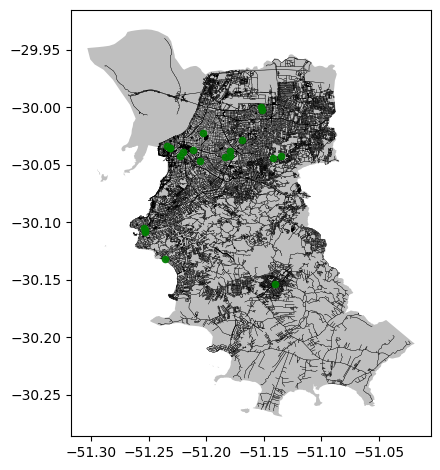

In [ ]:
# Legal! Agora, como podemos ver, temos nosso gráfico como GeoDataFrames e podemos plotá-los
# usando as mesmas funções e ferramentas que usamos antes.

# Plote a pegada
ax = area.plot(facecolor='gray',alpha=0.5)

# # Plotar arestas de rua
edges.plot(ax=ax, linewidth=0.2, edgecolor='black')

# Traçar os restaurantes com um alto valor de zorder
restaurants.plot(ax=ax, color='green', alpha=0.9, markersize=20, zorder=10)

# # Prédios do lote
# buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Ajustar o layout do gráfico
plt.tight_layout()

In [ ]:
##Criando uma coluna para contar o numero de restaurantes
restaurants['restaurant_count'] = restaurants.apply(lambda row: len(restaurants[restaurants.geometry.within(row.geometry)]), axis=1)
#Ordene os dados
restaurants = restaurants.sort_values(by='restaurant_count', ascending=False)


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:183: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a nump

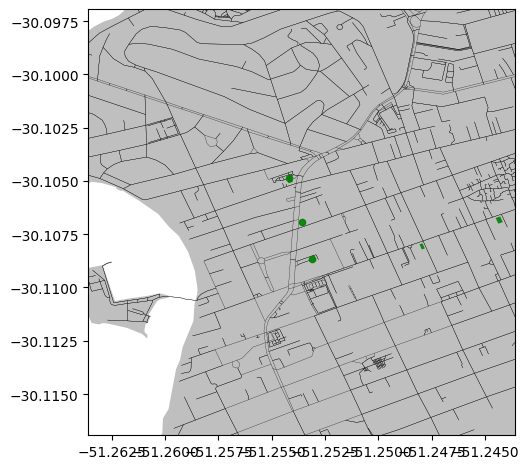

In [ ]:
##nova figura
fig, ax_zoom = plt.subplots()
# Definir limites do zoom com base no polígono da primeira entrada
bounds = restaurants.iloc[0].geometry.bounds

# Calcular a média dos limites para obter o centro da região
center_x = (bounds[0] + bounds[2]) / 2
center_y = (bounds[1] + bounds[3]) / 2

# Definir o tamanho do zoom (pode ser ajustado conforme necessário)
zoom_size = 0.01

# Definir novos limites para o zoom
ax_zoom.set_xlim(center_x - zoom_size, center_x + zoom_size)
ax_zoom.set_ylim(center_y - zoom_size, center_y + zoom_size)

# Plotar a área de interesse no zoom
area.plot(facecolor='gray', alpha=0.5, ax=ax_zoom)

# Plotar as arestas das ruas no zoom
edges.plot(ax=ax_zoom, linewidth=0.2, edgecolor='black')

# Traçar os restaurantes no zoom
restaurants.plot(ax=ax_zoom, color='green', alpha=0.9, markersize=20, zorder=10)
# Ajustar o layout do gráfico de zoom
plt.tight_layout()

# Exibir as duas figuras
plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:183: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a nump

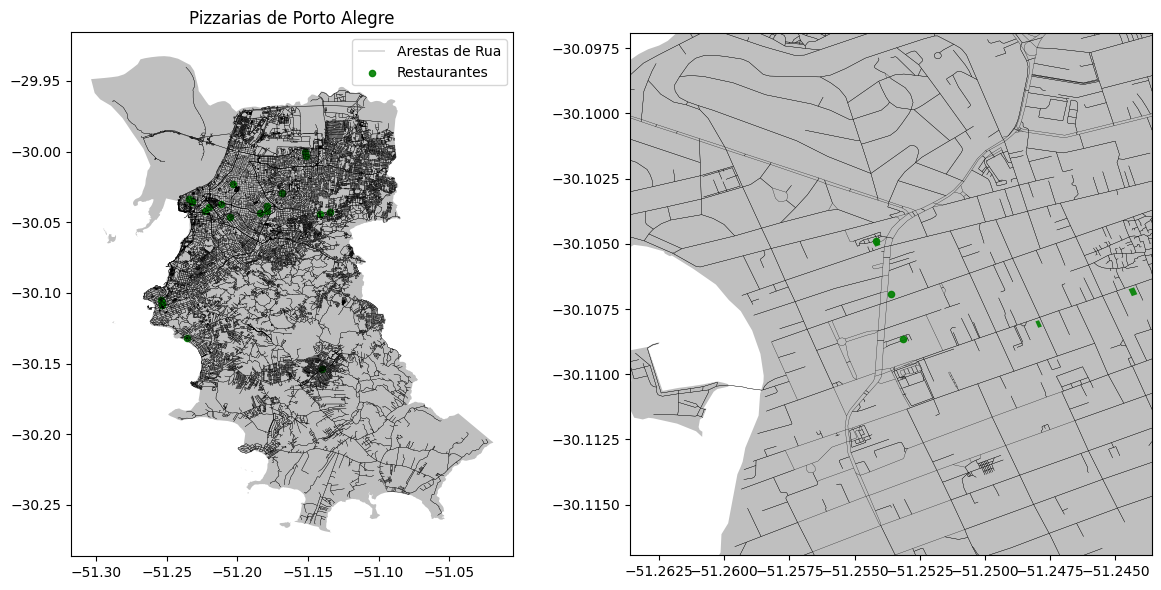

In [ ]:
# Criar uma figura com duas sub-figuras lado a lado
fig, (ax_all, ax_zoom) = plt.subplots(1, 2, figsize=(12, 6))

# Obter o valor da coluna place_name para a área de interesse
area_label = area['place_name'].values[0]

# Plotar todas as informações sem o zoom na sub-figura esquerda (ax_all)
area.plot(facecolor='gray', alpha=0.5, ax=ax_all, label=f'Área ({area_label})')
edges.plot(ax=ax_all, linewidth=0.2, edgecolor='black', label='Arestas de Rua')
restaurants.plot(ax=ax_all, color='green', alpha=0.9, markersize=20, label='Restaurantes')

# Definir título para o mapa
ax_all.set_title('Pizzarias de Porto Alegre')

# Adicionar legenda ao mapa
ax_all.legend()

# Definir limites do zoom com base no polígono da primeira entrada
bounds = restaurants.iloc[0].geometry.bounds

# Calcular a média dos limites para obter o centro da região
center_x = (bounds[0] + bounds[2]) / 2
center_y = (bounds[1] + bounds[3]) / 2

# Definir o tamanho do zoom (pode ser ajustado conforme necessário)
zoom_size = 0.01

# Definir novos limites para o zoom
ax_zoom.set_xlim(center_x - zoom_size, center_x + zoom_size)
ax_zoom.set_ylim(center_y - zoom_size, center_y + zoom_size)

# Plotar a área de interesse no zoom
area.plot(facecolor='gray', alpha=0.5, ax=ax_zoom)
edges.plot(ax=ax_zoom, linewidth=0.2, edgecolor='black')
restaurants.plot(ax=ax_zoom, color='green', alpha=0.9, markersize=20, zorder=10)

# Ajustar o layout das sub-figuras
plt.tight_layout()

# Exibir a figura com as duas sub-figuras
plt.show()


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:183: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a nump

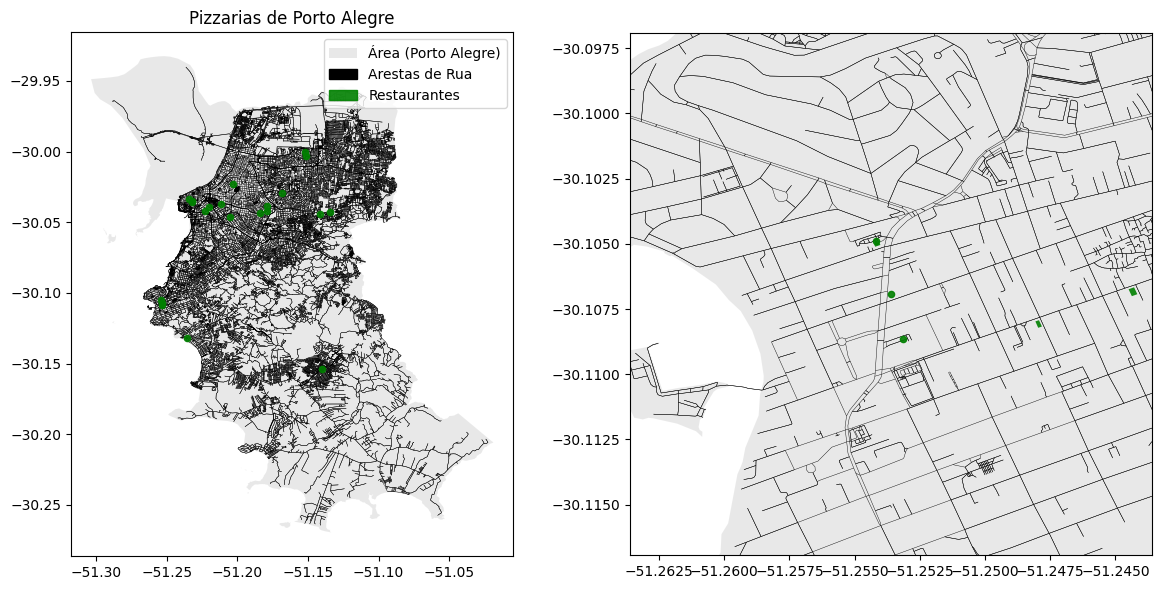

In [ ]:
import matplotlib.patches as mpatches

# Criar uma figura com duas sub-figuras lado a lado
fig, (ax_all, ax_zoom) = plt.subplots(1, 2, figsize=(12, 6))

# Plotar todas as informações sem o zoom na sub-figura esquerda (ax_all)
area.plot(facecolor='lightgray', alpha=0.5, ax=ax_all)
edges.plot(ax=ax_all, linewidth=0.3, linestyle='-', color='black', label='Arestas de Rua')
restaurants.plot(ax=ax_all, color='green', alpha=0.9, markersize=20, label='Restaurantes', zorder=20)

# Criar patches para as legendas
area_patch = mpatches.Patch(facecolor='lightgray', alpha=0.5, label='Área (Porto Alegre)')
edges_patch = mpatches.Patch(color='black', label='Arestas de Rua')
restaurants_patch = mpatches.Patch(color='green', alpha=0.9, label='Restaurantes')

# Adicionar os patches à lista de legendas
legend_patches = [area_patch, edges_patch, restaurants_patch]

# Adicionar legenda à sub-figura ax_all
ax_all.legend(handles=legend_patches, loc='upper right')

# Definir título para o mapa
ax_all.set_title('Pizzarias de Porto Alegre')

# Definir limites do zoom com base no polígono da primeira entrada
bounds = restaurants.iloc[0].geometry.bounds

# Calcular a média dos limites para obter o centro da região
center_x = (bounds[0] + bounds[2]) / 2
center_y = (bounds[1] + bounds[3]) / 2

# Definir o tamanho do zoom (pode ser ajustado conforme necessário)
zoom_size = 0.01

# Definir novos limites para o zoom
ax_zoom.set_xlim(center_x - zoom_size, center_x + zoom_size)
ax_zoom.set_ylim(center_y - zoom_size, center_y + zoom_size)

# Plotar a área de interesse no zoom
area.plot(facecolor='lightgray', alpha=0.5, ax=ax_zoom)
edges.plot(ax=ax_zoom, linewidth=0.3, linestyle='-', color='black')
restaurants.plot(ax=ax_zoom, color='green', alpha=0.9, markersize=20, zorder=20)

# Ajustar o layout das sub-figuras
plt.tight_layout()

# Exibir a figura com as duas sub-figuras
plt.show()


In [ ]:
# Extrair valores de x e y da coluna "geometry"
restaurants['x'] = restaurants['geometry'].apply(lambda geom: geom.centroid.x)
restaurants['y'] = restaurants['geometry'].apply(lambda geom: geom.centroid.y)
restaurants

,osmid,geometry,amenity,cuisine,name,element_type,addr:city,addr:housenumber,addr:postcode,addr:street,...,shop,start_date,email,landuse,drive_through,smoking,building:levels,restaurant_count,x,y
1245887101,1245887101,POINT (-51.25360 -30.10694),restaurant,pizza,Pizza Pizza,node,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-51.253600,-30.106936
242377841,242377841,"POLYGON ((-51.18596 -30.01858, -51.18597 -30.0...",restaurant,pizza,Pizzaria e Bistrô do Marquês,way,Porto Alegre,1798,NaN,Rua Marquês do Pombal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-51.185884,-30.018482
6903916013,6903916013,POINT (-51.23593 -30.13174),restaurant,pizza,Pizza Hut,node,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-51.235928,-30.131740
188942531,188942531,"POLYGON ((-51.24807 -30.10798, -51.24793 -30.1...",restaurant,pizza,La Sereníssima,way,NaN,1109,91910-001,Avenida Otto Niemeyer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-51.247945,-30.108074
188942532,188942532,"POLYGON ((-51.24450 -30.10674, -51.24429 -30.1...",restaurant,pizza,La Tarantella,way,NaN,1465,91910-001,Avenida Otto Niemeyer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-51.244328,-30.106838
203129765,203129765,"POLYGON ((-51.25410 -30.10497, -51.25405 -30.1...",restaurant,pizza,Babbo Giovanni,way,NaN,1823,91900-000,Avenida Wenceslau Escobar,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,1,-51.254145,-30.104999
225105671,225105671,"POLYGON ((-51.20839 -30.07666, -51.20844 -30.0...",restaurant,pizza,La Più Buona,way,NaN,2645,90870-000,Avenida Teresópolis,...,NaN,2006,NaN,NaN,NaN,NaN,NaN,1,-51.208293,-30.076732
235910433,235910433,"POLYGON ((-51.22340 -30.03977, -51.22334 -30.0...",fast_food,pizza,Pizzinha 4 Formaggio,way,NaN,541,NaN,Rua José do Patrocínio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-51.223486,-30.039882
242646557,242646557,"POLYGON ((-51.22242 -30.05347, -51.22241 -30.0...",restaurant,pizza,Taco Pub,way,NaN,989,NaN,Avenida Getúlio Vargas,...,NaN,2005,tacopub@tacopub.com.br,NaN,NaN,NaN,NaN,1,-51.222505,-30.053432
6243236373,6243236373,POINT (-51.22262 -30.04220),restaurant,pizza,Bistrô da Travessa,node,NaN,25,NaN,Travessa dos Venezianos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-51.222622,-30.042196


In [ ]:
import folium

# Criar mapa inicial centrado nas coordenadas médias dos restaurantes
center = [-30.029048,-51.168554]
zoom = 14
map_all = folium.Map(location=center, zoom_start=zoom)

# Adicionar a área de Porto Alegre ao mapa
folium.GeoJson(area.geometry.to_json(),
               name='Área (Porto Alegre)',
               style_function=lambda x: {'fillColor': 'gray', 'color': 'red'}).add_to(map_all)

# Adicionar as arestas de rua ao mapa
folium.GeoJson(edges.geometry.to_json(),
               name='Arestas de Rua',
               style_function=lambda x: {'color': 'black'}).add_to(map_all)

# Criar um grupo para os marcadores dos restaurantes
restaurant_group = folium.FeatureGroup(name='Restaurantes')

# Adicionar os marcadores dos restaurantes ao grupo
for _, restaurant in restaurants.iterrows():
    centroid = restaurant.geometry.centroid
    folium.Marker(
        location=[centroid.y, centroid.x],
        icon=folium.Icon(color='red', icon='cutlery'),
        tooltip=restaurant['name']
    ).add_to(restaurant_group)

# Adicionar o grupo de restaurantes ao mapa
restaurant_group.add_to(map_all)

# Adicionar controle de camadas ao mapa
folium.LayerControl().add_to(map_all)

# # Exibir o mapa
# map_all

In [ ]:
# Salvar o mapa como um arquivo HTML
map_all.save('map_all.html')